In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [97]:
df = pd.read_csv('creditcard.csv')
print(df.head())  
print(df.tail())  
print(df.columns)  

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Class
0    284315
1       492
Name: count, dtype: int64


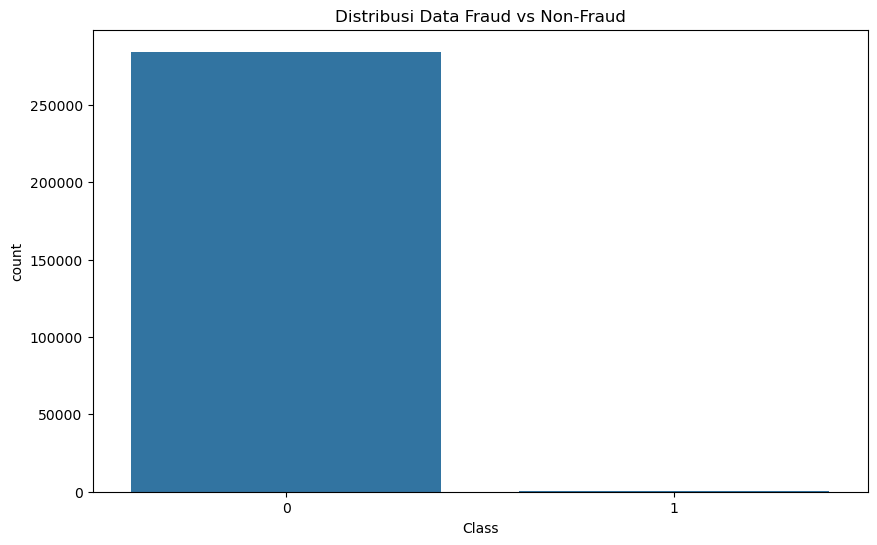

In [98]:
# distribusi kelas ( fraud vs non fraud)
print(df['Class'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Class'])
plt.title("Distribusi Data Fraud vs Non-Fraud")
plt.show()

In [99]:
# standarisasi kolom 'Amount'
if 'Amount' in df.columns:
    df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
else:
    print("Kolom 'Amount' tidak ditemukan dalam dataframe.")


In [100]:
# Pisahkan fitur dan label
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [101]:
# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [103]:
# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


RandomForest Accuracy: 0.9995611109160493
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56862     2]
 [   23    75]]


In [104]:
# Oversampling dengan SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [105]:
# Model XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [106]:
# Prediksi dengan XGBoost
y_prob = xgb_model.predict_proba(X_test)[:, 1]
new_threshold = 0.5
y_pred_xgb = (y_prob > new_threshold).astype(int)


In [107]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9994382219725431
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56848    16]
 [   16    82]]


In [108]:
# Statistik data berdasarkan kelas
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
print("Jumlah Transaksi Legit:", legit.shape[0])
print("Jumlah Transaksi Fraud:", fraud.shape[0])
print(legit['Amount'].describe())
print(fraud['Amount'].describe())


Jumlah Transaksi Legit: 284315
Jumlah Transaksi Fraud: 492
count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64
count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64


In [109]:
# balance dataset dengan oversampling
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
print("Distribusi Kelas Setelah Balancing: ")
print(new_dataset['Class'].value_counts())


Distribusi Kelas Setelah Balancing: 
Class
0    492
1    492
Name: count, dtype: int64


In [110]:
x = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print("Dimensi Data Training: ", x_train.shape, y_train.shape)

Dimensi Data Training:  (787, 30) (787,)


In [112]:
# Model Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

e:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print("Akurasi Data Training : ", training_data_accuracy)

Akurasi Data Training:  0.9504447268106735


In [ ]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Akurasi Data Testing : ", test_data_accuracy)

Akurasi Data Testing:  0.9441624365482234
